In [2]:
!pip3 install dtaidistance
!pip3 install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pandas import read_csv
from matplotlib import pyplot
from dtaidistance import dtw
from tslearn.barycenters import dtw_barycenter_averaging

import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import os
os.chdir('/content/drive/My Drive/CS598HAN/UCR_TS_Archive_2015/')

In [6]:
sources = ['Meat/Meat_TRAIN', 'ECGFiveDays/ECGFiveDays_TRAIN', 'InlineSkate/InlineSkate_TRAIN',  'InlineSkate/InlineSkate_TRAIN',                   '50words/50words_TRAIN'] # 'HandOutlines/HandOutlines_TRAIN'
targets = ['Wine/Wine_TRAIN', 'Wine/Wine_TRAIN',                  'Meat/Meat_TRAIN',             'DiatomSizeReduction/DiatomSizeReduction_TRAIN',    'DiatomSizeReduction/DiatomSizeReduction_TRAIN'] # 'ShapeletSim/ShapeletSim_TRAIN'

# Code for generating prototype for each class in a *dataset*

# Dynamic Time Warping (DTW) with DBA
#####https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html

In [7]:
def DBA(df_prototype_s, df_prototype_t):
  for i in range(len(df_prototype_s)):
    for j in range(len(df_prototype_t)):
      ts1 = np.array(df_prototype_s.iloc[i])
      ts2 = np.array(df_prototype_t.iloc[j])
      d = dtw.distance_fast(ts1, ts2, use_pruning=True)
      print(d)

In [11]:
def generate_prototype(df_source, df_target):
  #df_prototype_s = df_source.groupby(level=0).mean()
  #df_prototype_t = df_target.groupby(level=0).mean()

  df_prototype_s = {}
  df_prototype_t = {}

  for i in range(len(df_source)):
    dfs_class                 = df_source.iloc[i].name
    df_prototype_s[dfs_class] = []

  for i in range(len(df_target)):
    dft_class                 = df_target.iloc[i].name
    df_prototype_t[dft_class] = []

  for i in range(len(df_source)):
    dfs                       = df_source.iloc[i]
    dfs_class                 = df_source.iloc[i].name
    df_prototype_s[dfs_class].append(dfs.to_numpy())

  for i in range(len(df_target)):
    dft                       = df_target.iloc[i]
    dft_class                 = df_target.iloc[i].name
    df_prototype_t[dft_class].append(dft.to_numpy())

  source_barycenters  = {}  # len(df_prototype_s)
  target_barycenters  = {}  # len(df_prototype_t)

  for c in (df_prototype_s.keys()):
    source_barycenters[c] = dtw_barycenter_averaging(df_prototype_s[c])

  for c in (df_prototype_t.keys()):
    target_barycenters[c] = dtw_barycenter_averaging(df_prototype_t[c])

  min_dtw = float("inf")
  min_class = ()

  for i, source_barycenter in source_barycenters.items():
    for j, target_barycenter in target_barycenters.items():
      # Calculate DTW distance
      dtw_distance = dtw.distance(source_barycenter, target_barycenter)

      # Update minimum DTW distance and corresponding class if necessary
      if dtw_distance < min_dtw:
          min_dtw = dtw_distance
          min_class = (i, j)
  print("Most similar class(source-target): ", min_class)
  print("Minimum distance between them: ", min_dtw)
  print("\n")

## Randomly chosen source and target dataset similarity measurement

---


In [12]:
for s, t in zip(sources, targets):
  print(s, '-', t)
  df_source = read_csv(s, header=None, index_col=0)
  df_target = read_csv(t, header=None, index_col=0)
  generate_prototype(df_source, df_target)

Meat/Meat_TRAIN - Wine/Wine_TRAIN
Most similar class(source-target):  (2, 1)
Minimum distance between them:  6.5469717781685


ECGFiveDays/ECGFiveDays_TRAIN - Wine/Wine_TRAIN
Most similar class(source-target):  (1, 1)
Minimum distance between them:  10.422177100513005


InlineSkate/InlineSkate_TRAIN - Meat/Meat_TRAIN
Most similar class(source-target):  (4, 1)
Minimum distance between them:  11.49071176679911


InlineSkate/InlineSkate_TRAIN - DiatomSizeReduction/DiatomSizeReduction_TRAIN
Most similar class(source-target):  (1, 3)
Minimum distance between them:  4.931585785582251


50words/50words_TRAIN - DiatomSizeReduction/DiatomSizeReduction_TRAIN
Most similar class(source-target):  (49, 3)
Minimum distance between them:  10.769732061619512




## Interesting source-target pairs (with reasons for their selection)
---



1. RefrigerationDevices -> ShapeletSim (small size of training set)
2. 50words -> HandOutliers (Relatedness to shapelets)
3. WordsSynonyms -> HandOutliers (Relatedness to shapelets)
4. Strawberry -> Meat (transfer learning accuracy variation)
5. Beef -> Meat (transfer learning accuracy variation)




In [11]:
df_source = read_csv('RefrigerationDevices/RefrigerationDevices_TRAIN', header=None, index_col=0)
df_target = read_csv('ShapeletSim/ShapeletSim_TRAIN', header=None, index_col=0)
generate_prototype(df_source, df_target)

Most similar class(source-target):  (1, 1)
Minimum distance between them:  12.555812838330903


In [15]:
df_source = read_csv('Car/Car_TRAIN', header=None, index_col=0)
df_target = read_csv('ShapeletSim/ShapeletSim_TRAIN', header=None, index_col=0)
generate_prototype(df_source, df_target)

Most similar class(source-target):  (2, 1)
Minimum distance between them:  16.738063197450185




Caution - Do not run: Memory crash

In [ ]:
df_source = read_csv('50words/50words_TRAIN', header=None, index_col=0)
df_target = read_csv('HandOutlines/HandOutlines_TRAIN', header=None, index_col=0)
generate_prototype(df_source, df_target)

In [ ]:
df_source = read_csv('WordsSynonyms/WordsSynonyms_TRAIN', header=None, index_col=0)
df_target = read_csv('HandOutlines/HandOutlines_TRAIN', header=None, index_col=0)
generate_prototype(df_source, df_target)

In [13]:
df_source = read_csv('Strawberry/Strawberry_TRAIN', header=None, index_col=0)
df_target = read_csv('Meat/Meat_TRAIN', header=None, index_col=0)
generate_prototype(df_source, df_target)

Most similar class(source-target):  (2, 3)
Minimum distance between them:  2.1764866573784327




In [14]:
df_source = read_csv('Beef/Beef_TRAIN', header=None, index_col=0)
df_target = read_csv('Meat/Meat_TRAIN', header=None, index_col=0)
generate_prototype(df_source, df_target)

Most similar class(source-target):  (3, 1)
Minimum distance between them:  3.738592244173742




# Visualization

### With all time series

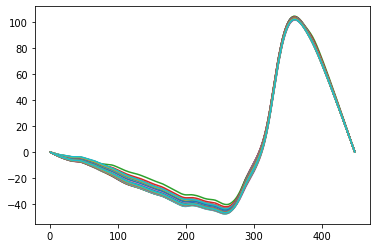

In [ ]:
for i in range(len(df_source)):
    ts                = df_source.iloc[i]
    ts                = ts.cumsum()
    ts.plot()

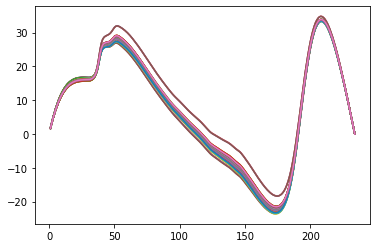

In [ ]:
for i in range(len(df_target)):
    ts                = df_target.iloc[i]
    ts                = ts.cumsum()
    ts.plot()

### With prototypes

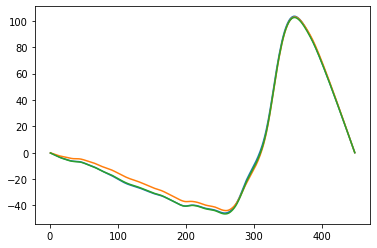

In [ ]:
for i in range(len(df_prototype_s)):
    ts                = df_prototype_s.iloc[i]
    ts                = ts.cumsum()
    ts.plot()

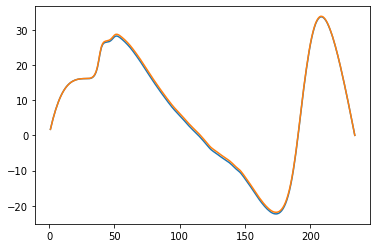

In [ ]:
for i in range(len(df_prototype_t)):
    ts                = df_prototype_t.iloc[i]
    ts                = ts.cumsum()
    ts.plot()